# Kaggle team name: vijf5!

# Members:
1. Jesse Coenraad -> JesseCoenraad
2. Jordan van Sintanneland -> JordanvanSint
3. Casper Priem -> CasperPriem
4. Jassar Hasiba -> UrClades

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import StandardScaler
from scipy import stats

# 1. Exploratieve Data Analyse (EDA)

In [94]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

### 1.1 Uitleg van iedere kolom

0: id: uniek id van het persoon

1: age: leeftijd

3: hypertension: hoge bloeddruk (0 is nee, 1 is ja)

4: heart_disease: hart- en vaatziekten (0 is nee, 1 is ja)

5: avg_glucose_level: gemiddeld glucoselevel gemeten in mmol/L

6: bmi: bmi van de persoon 

7: gender_female: geslacht (True or False)

8: Gender_other: People who identify as something other than male or female

9: Every_married_no: geeft aan wie er niet getrouwd is.

10: Every_married_yes: geeft aan wie er wel getrouwd is.

11: Work_type_Govt_job: geeft aan wie er een baan heeft die te maken heeft met veiligheid van de bevolking.

12: work_type_never_worked: mensen die nooit gewerkt hebben.

13: work_type_private_work: mensen die privé werk doen.

14: work_type_Self_employed: mensen die eigen baas zijn.

15: work_type_children: kinderen tot 16 die werkzaam zijn.

16: Residence_type_rural: heeft de person een huis in een landelijk gebied. (True or False)

17: Residence_type_urban: heeft de persoon een huis in een stedelijk gebied. (True or False)

18: Smoking_status_formerly smoked: heeft de person in het verleden gerookt.  (True or False)

19: Smoking_status_never smoked: heeft de persoon ooit gerookt.  (True or False)

20: Smoking_status_smokes: Rookt de persoon momenteel actief.  (True or False)

21: Stroke: Heeft de persoon een beroerte gehad. (True or False)


### 1.2 Beschrijf in hoeverre de data voldoet aan de minimale vereisten voor Machine Learning met Scikit Learn

De data voldoet aan alle voorwaarde voor machine learning met Scikit learn.

- Het zijn numerieke waardes
- Er zijn geen missende waardes
- Het staat in een dataframe

In [4]:
display(train.head())
display(train.info())
display(train.describe())

id   age  hypertension  heart_disease  avg_glucose_level   bmi  \
0  52709  30.0             0              0              63.60  33.3   
1  72295  75.0             1              0             215.17  48.0   
2  26451  15.0             0              0             135.22  19.0   
3  65210  47.0             0              0              64.89  28.2   
4  69299  49.0             0              0             222.34  28.8   

   gender_Female  gender_Male  gender_Other  ever_married_No  ...  \
0          False         True         False             True  ...   
1           True        False         False            False  ...   
2          False         True         False             True  ...   
3          False         True         False            False  ...   
4          False         True         False            False  ...   

   work_type_Never_worked  work_type_Private  work_type_Self-employed  \
0                   False               True                    False   
1                   False              False                     True   
2                   False               True                    False   
3                   False              False                     True   
4                   False              False                     True   

   work_type_children  Residence_type_Rural  Residence_type_Urban  \
0               False                  True                 False   
1               False                  True                 False   
2               False                  True                 False   
3               False                 False                  True   
4               False                  True                 False   

   smoking_status_formerly smoked  smoking_status_never smoked  \
0                           False                        False   
1                           False                         True   
2                           False                         True   
3                           False                         True   
4                            True                        False   

   smoking_status_smokes  stroke  
0                   True       0  
1                  False       0  
2                  False       0  
3                  False       0  
4                  False       0  

[5 rows x 22 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33550 entries, 0 to 33549
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              33550 non-null  int64  
 1   age                             33550 non-null  float64
 2   hypertension                    33550 non-null  int64  
 3   heart_disease                   33550 non-null  int64  
 4   avg_glucose_level               33550 non-null  float64
 5   bmi                             33550 non-null  float64
 6   gender_Female                   33550 non-null  bool   
 7   gender_Male                     33550 non-null  bool   
 8   gender_Other                    33550 non-null  bool   
 9   ever_married_No                 33550 non-null  bool   
 10  ever_married_Yes                33550 non-null  bool   
 11  work_type_Govt_job              33550 non-null  bool   
 12  work_type_Never_worked          

None

id           age  hypertension  heart_disease  \
count  33550.000000  33550.000000  33550.000000   33550.000000   
mean   36746.393353     41.815312      0.088137       0.043040   
std    20906.519131     22.477423      0.283498       0.202951   
min        1.000000      0.080000      0.000000       0.000000   
25%    18763.250000     24.000000      0.000000       0.000000   
50%    36862.000000     43.000000      0.000000       0.000000   
75%    54757.500000     59.000000      0.000000       0.000000   
max    72943.000000     82.000000      1.000000       1.000000   

       avg_glucose_level           bmi        stroke  
count       33550.000000  33550.000000  33550.000000  
mean          103.587081     28.601216      0.015410  
std            42.127396      7.782248      0.123178  
min            55.010000     10.100000      0.000000  
25%            77.460000     23.300000      0.000000  
50%            91.320000     27.700000      0.000000  
75%           111.437500     32.800000      0.000000  
max           281.590000     97.600000      1.000000

<Axes: >

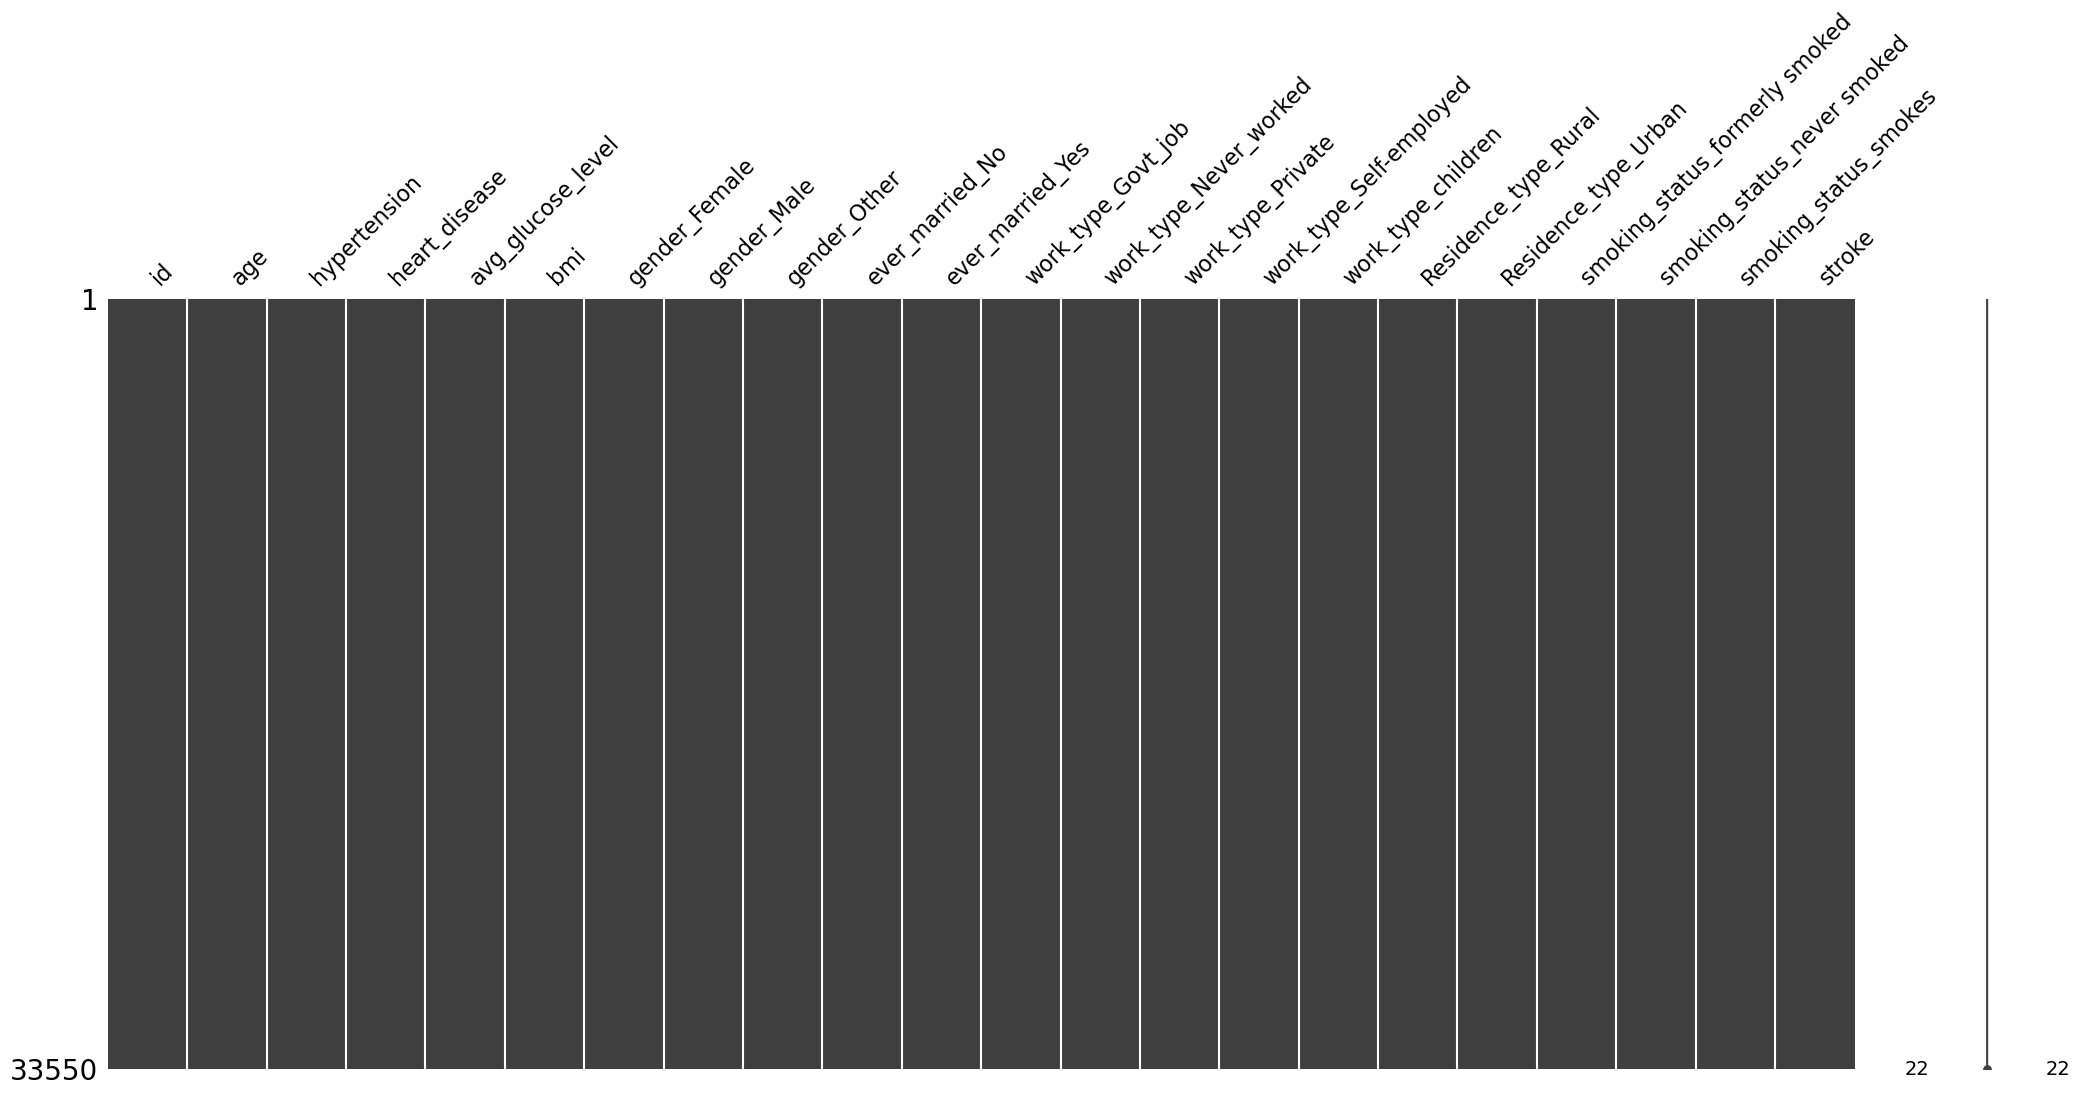

In [5]:
# Kijken of er missende data in de traindata zit
msno.matrix(train)

<Axes: >

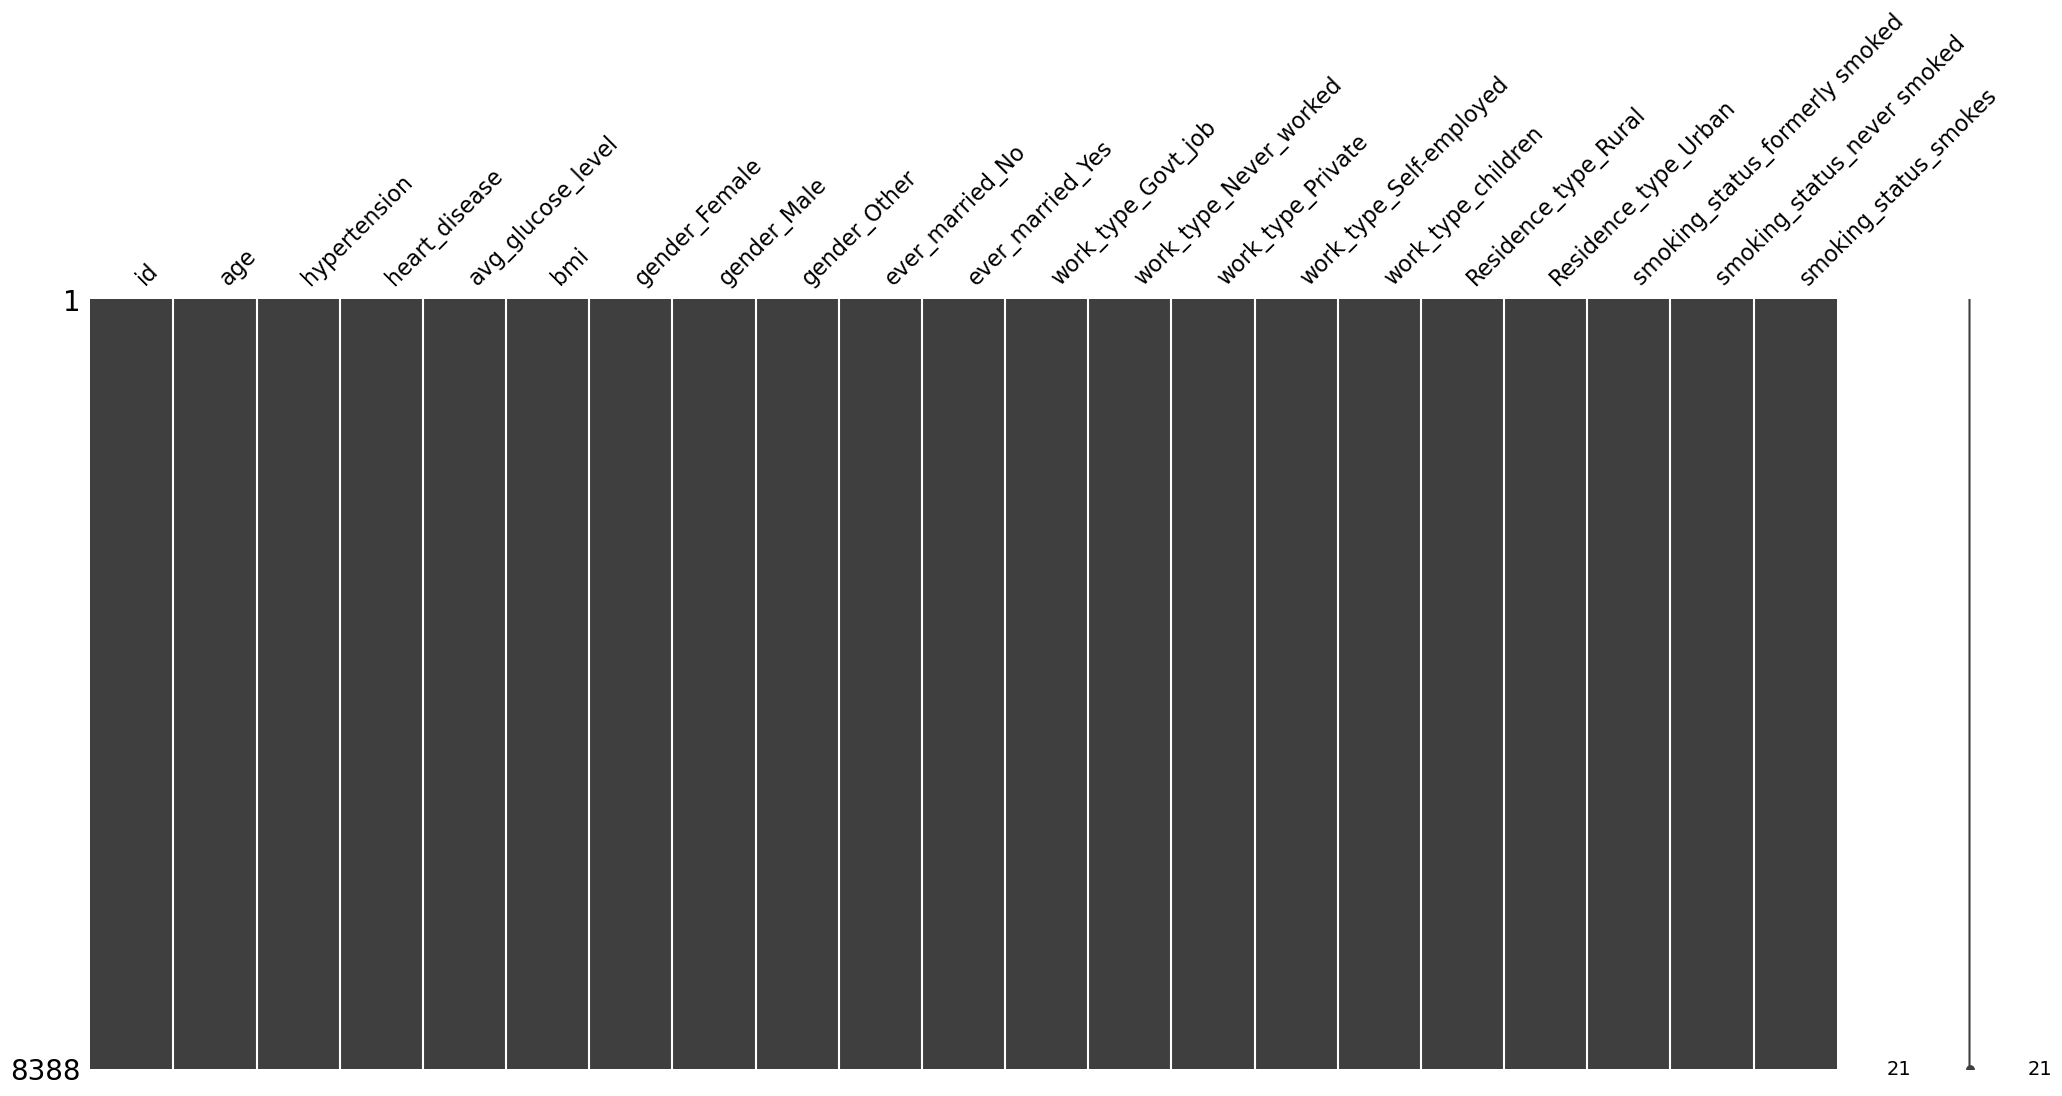

In [6]:
# Kijken of er missende data in de testdata zit
msno.matrix(test)

### 1.2.1 maak de evenutele aanpassingen

Booleans omzetten naar 0 en 1

In [7]:
train = train.astype({col: int for col in train.columns if train[col].dtype == 'bool'})
test = test.astype({col: int for col in test.columns if test[col].dtype == 'bool'})

### 1.3 Onderzoek de relaties tussen de onafhankelijke variabelen enerzijds en de afhankelijke variabele anderzijds. Gebruik hierbij passende visualisaties

We zien dat er tussen bepaalde kolommen een directe corrolatie is, bijvoorbeeld man en vrouw. Dit moet worden aangepast zodat er geen multicollineariteit is.

<Axes: >

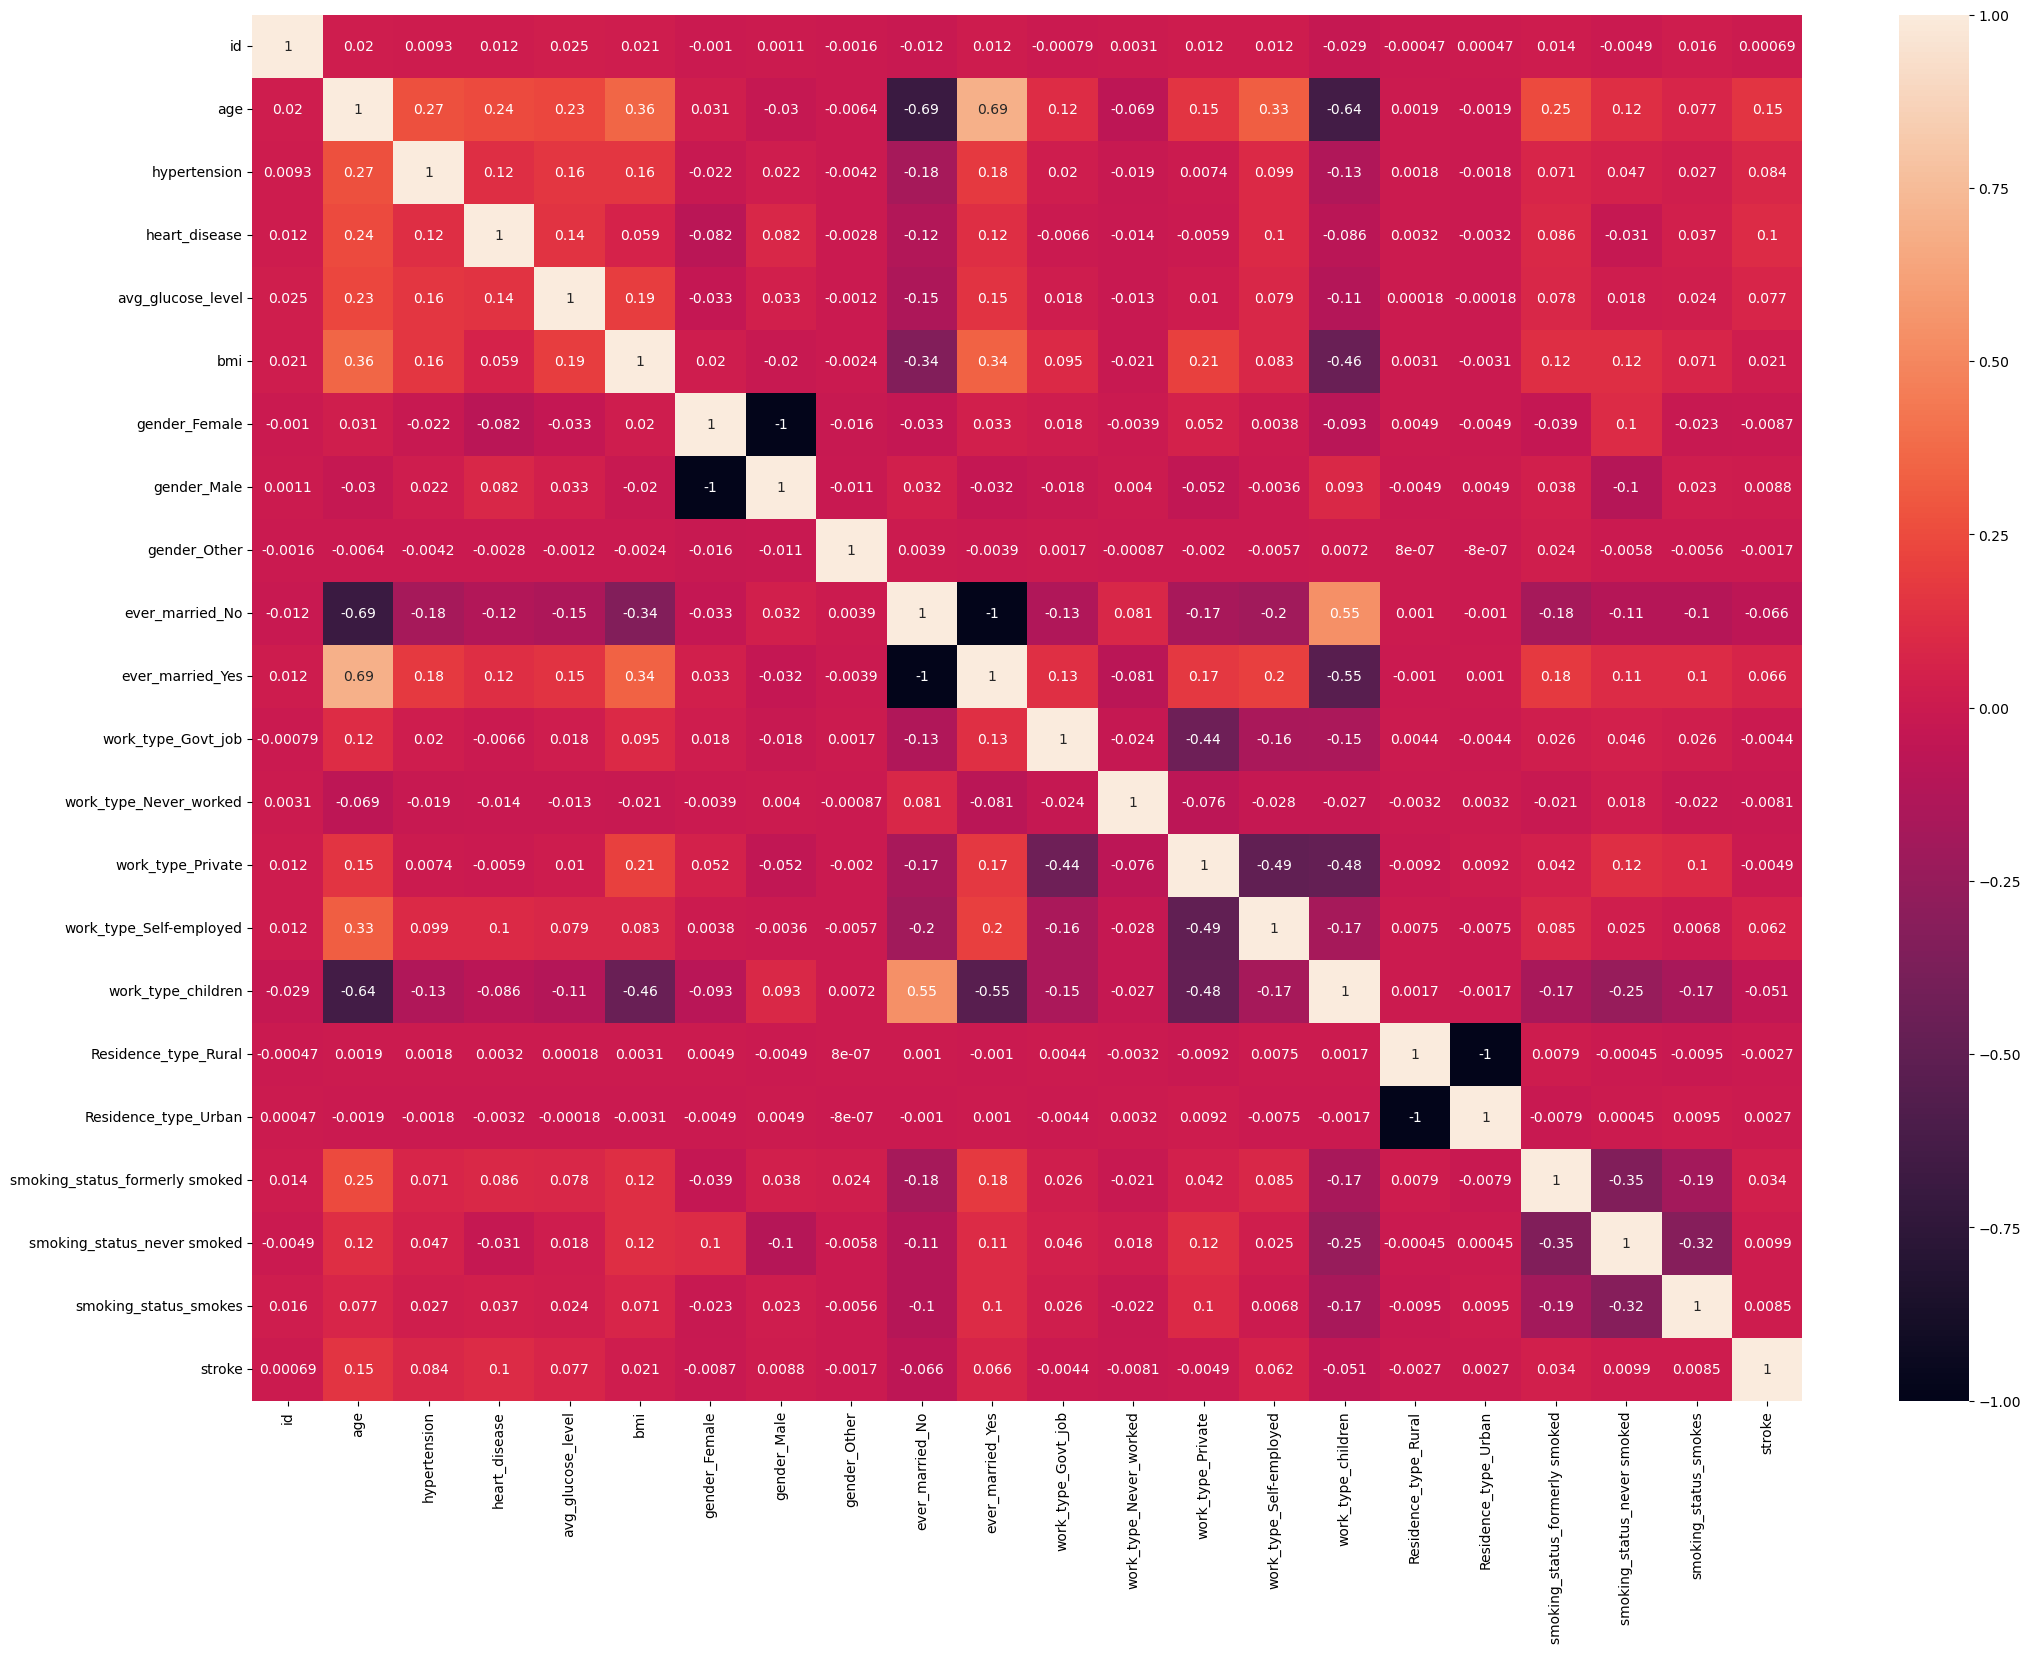

In [8]:
plt.figure(figsize=(25, 18))
sns.heatmap(train.corr(), annot=True)

In [9]:
cat_cols = train.drop(['id', 'age', 'avg_glucose_level', 'bmi'], axis=1)
num_cols = train[['age', 'avg_glucose_level', 'bmi']]

c:\Users\jassa\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


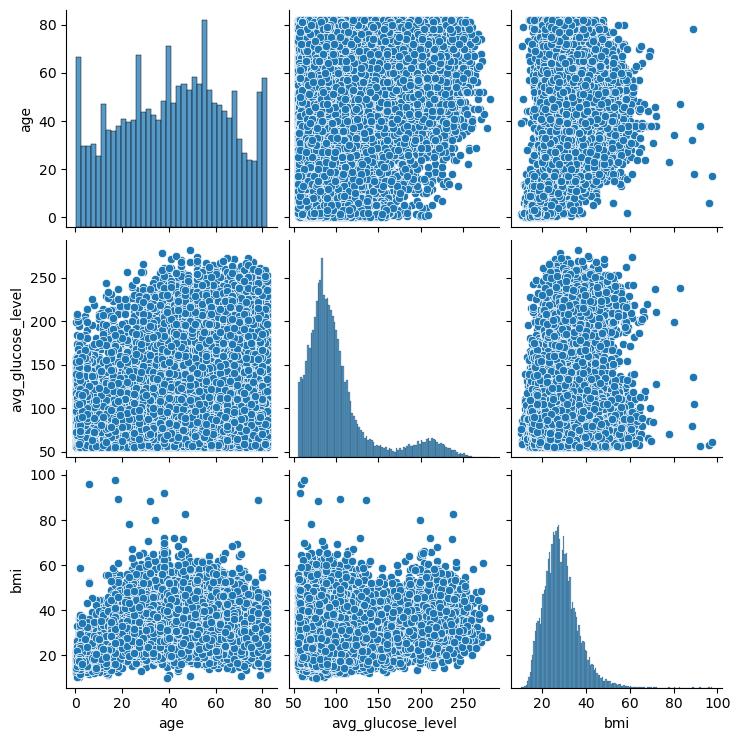

In [10]:
sns.pairplot(num_cols)
plt.show()

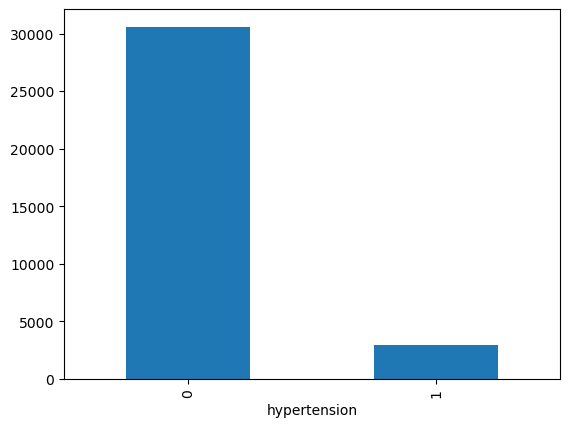

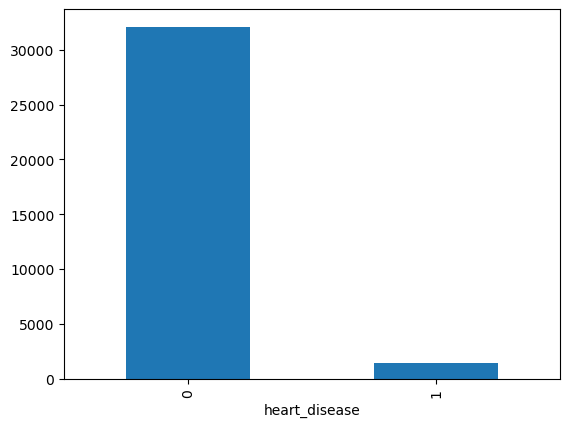

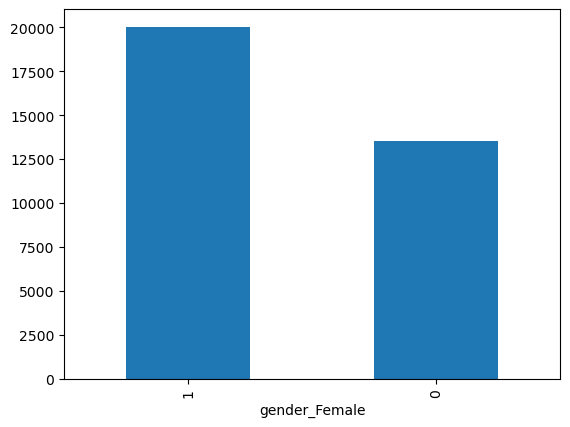

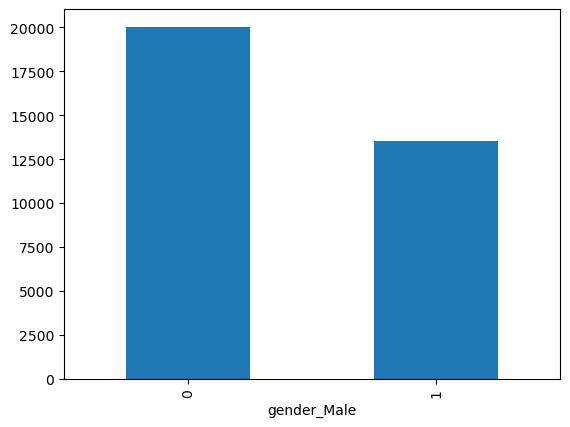

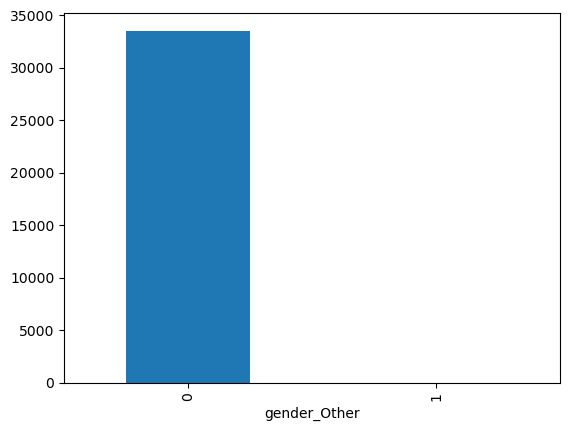

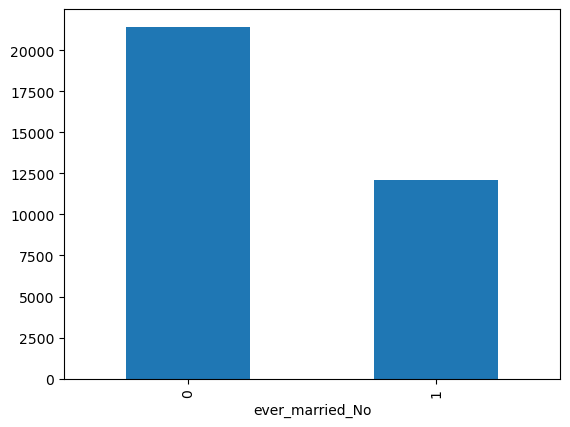

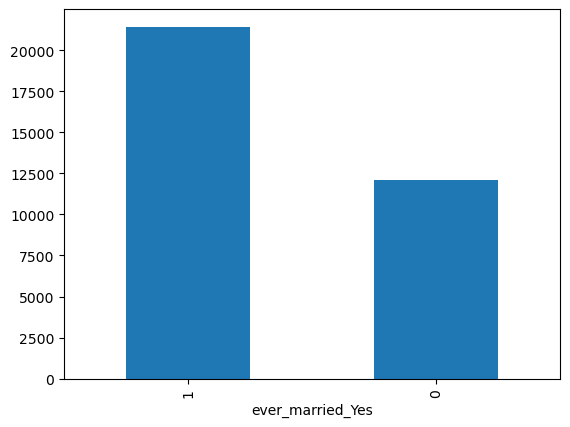

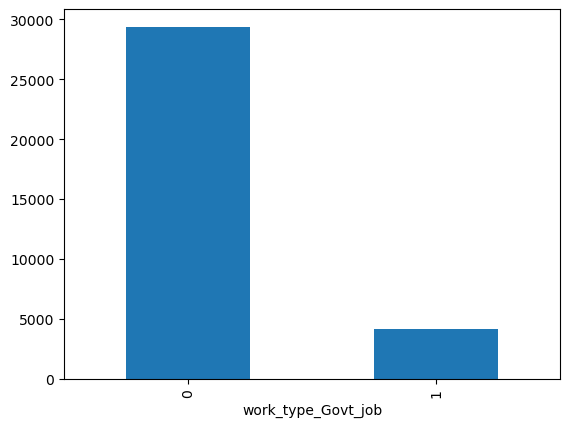

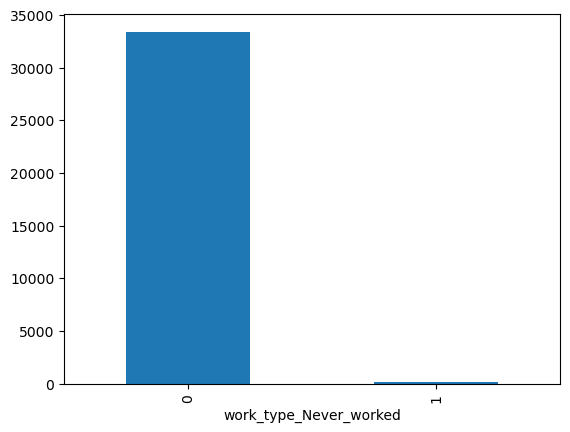

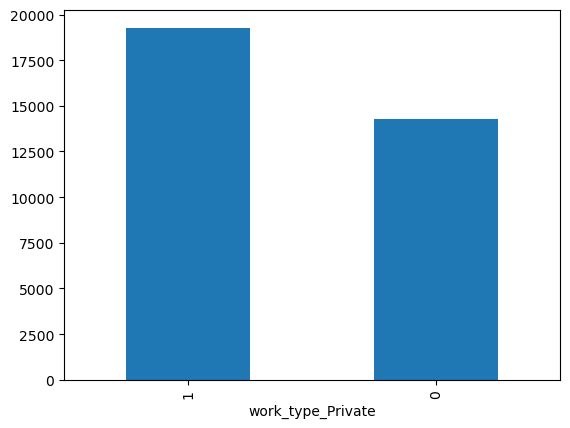

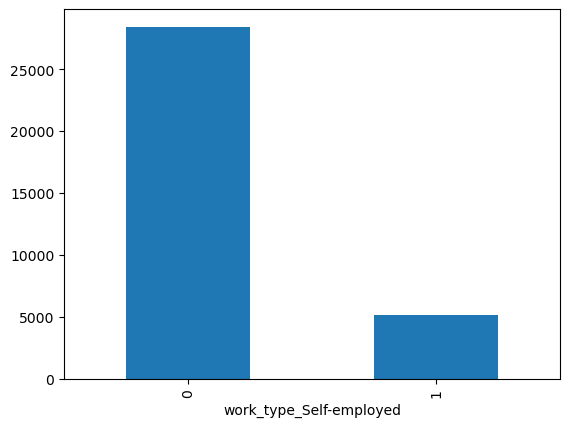

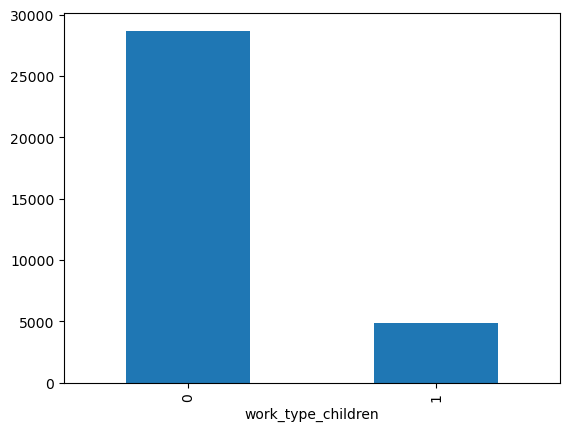

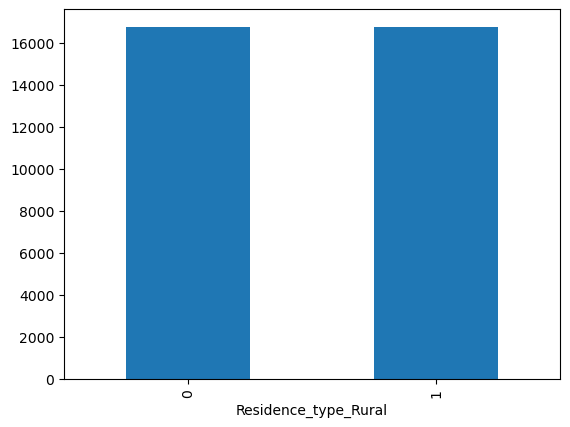

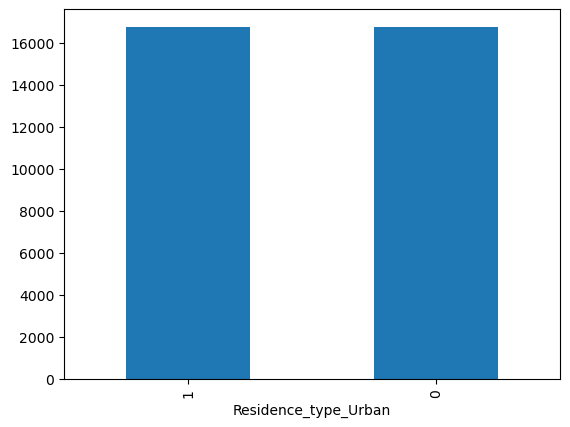

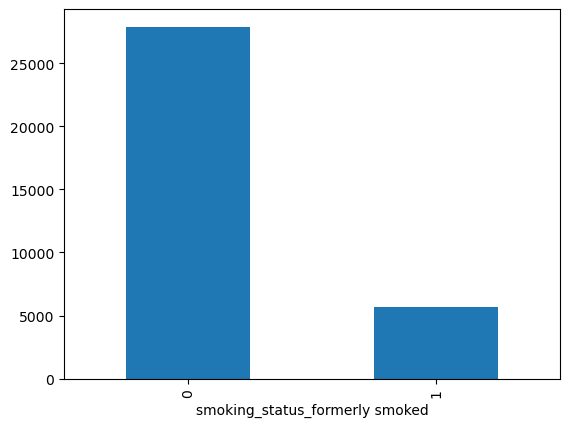

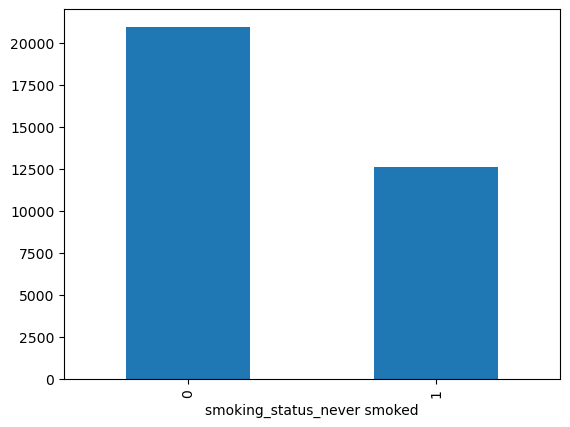

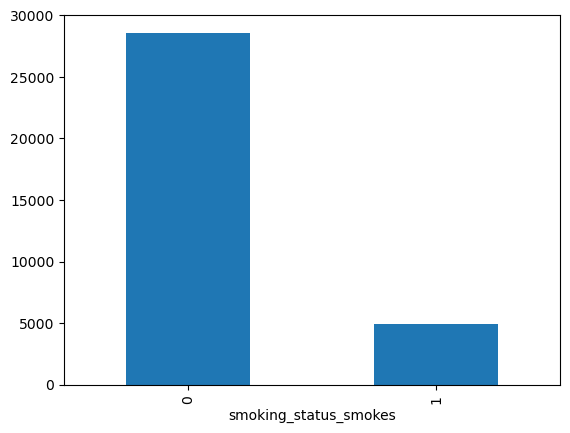

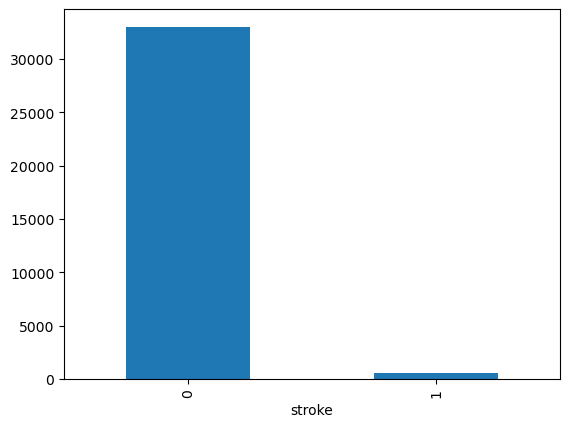

In [11]:
for i in cat_cols:
    train[i].value_counts().plot(kind='bar')
    plt.show()

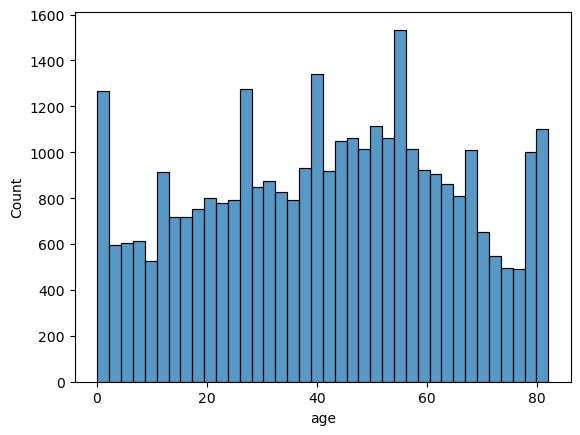

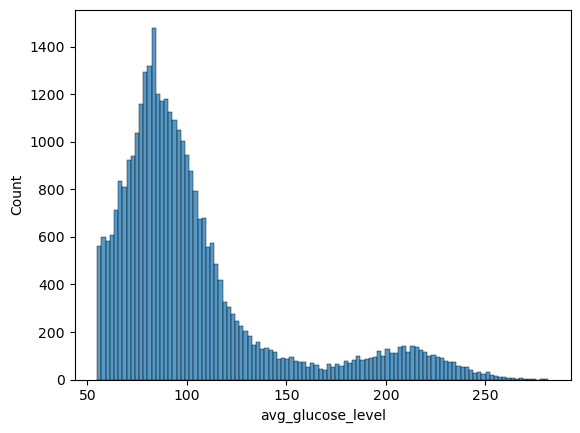

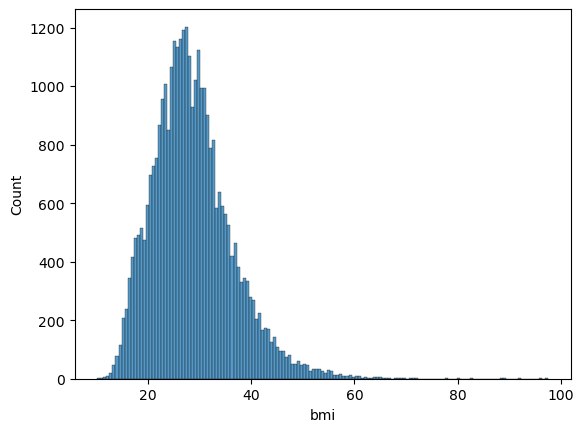

In [12]:
for i in num_cols:
    sns.histplot(x=train[i])
    plt.show()

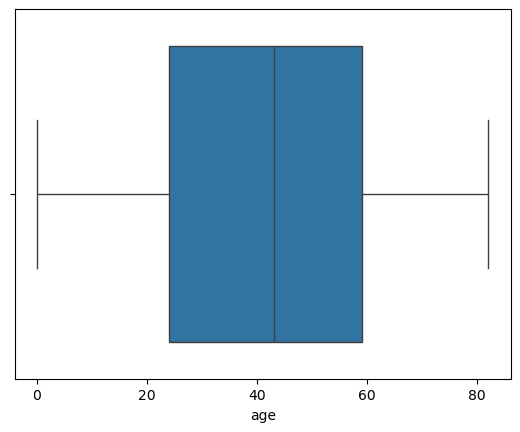

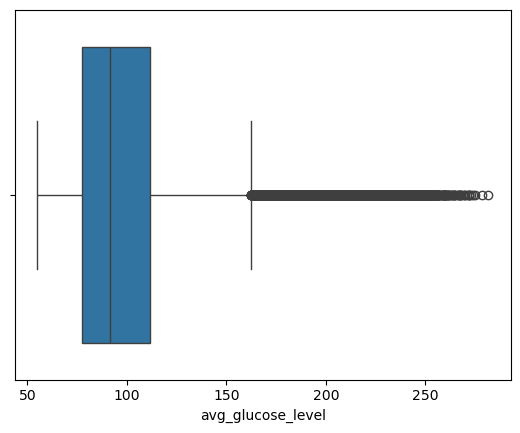

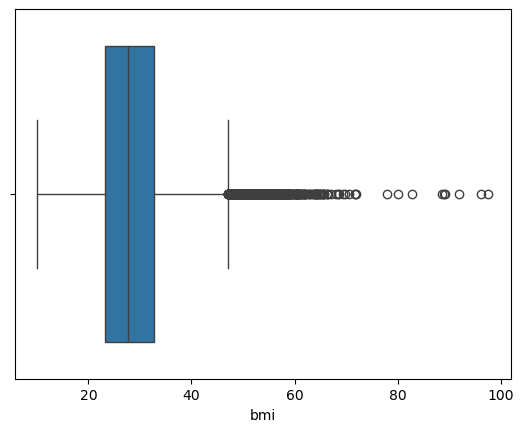

In [13]:
for i in num_cols:
    sns.boxplot(x=train[i])
    plt.show()

### 1.3.1 Omgaan met outliers

bmi heeft extreme outliers die niet mogelijk zijn terwijl extreem hoge avg_glucose_level waardes wel mogelijk zijn.

We bereken de Z-score en verwijderen hier dan de outliers

In [14]:
bmi_col = train[['bmi']]   # bmi heeft extreme outliers die niet mogelijk zijn terwijl extreem hoge avg_glucose_level waardes wel mogelijk zijn
z_scores = np.abs(stats.zscore(bmi_col))   # Z-scores berekenen
outliers = np.where(z_scores > 3)   # Outliers vinden
outliers_rows = bmi_col[(z_scores > 3).any(axis=1)]   # Rijen met outliers vinden
train = train.drop(outliers_rows.index)  # Rijen met outliers verwijderen

In [15]:
train

id   age  hypertension  heart_disease  avg_glucose_level   bmi  \
0      52709  30.0             0              0              63.60  33.3   
1      72295  75.0             1              0             215.17  48.0   
2      26451  15.0             0              0             135.22  19.0   
3      65210  47.0             0              0              64.89  28.2   
4      69299  49.0             0              0             222.34  28.8   
...      ...   ...           ...            ...                ...   ...   
33545  71911   9.0             0              0             109.80  14.5   
33546  19648  47.0             0              0              88.61  30.8   
33547  35550   3.0             0              0              89.68  16.2   
33548  65453  56.0             1              0              82.44  27.8   
33549   2084  64.0             0              0              90.11  30.2   

       gender_Female  gender_Male  gender_Other  ever_married_No  ...  \
0                  0            1             0                1  ...   
1                  1            0             0                0  ...   
2                  0            1             0                1  ...   
3                  0            1             0                0  ...   
4                  0            1             0                0  ...   
...              ...          ...           ...              ...  ...   
33545              0            1             0                1  ...   
33546              1            0             0                0  ...   
33547              1            0             0                1  ...   
33548              1            0             0                0  ...   
33549              1            0             0                0  ...   

       work_type_Never_worked  work_type_Private  work_type_Self-employed  \
0                           0                  1                        0   
1                           0                  0                        1   
2                           0                  1                        0   
3                           0                  0                        1   
4                           0                  0                        1   
...                       ...                ...                      ...   
33545                       0                  0                        0   
33546                       0                  1                        0   
33547                       0                  0                        0   
33548                       0                  0                        0   
33549                       0                  1                        0   

       work_type_children  Residence_type_Rural  Residence_type_Urban  \
0                       0                     1                     0   
1                       0                     1                     0   
2                       0                     1                     0   
3                       0                     0                     1   
4                       0                     1                     0   
...                   ...                   ...                   ...   
33545                   1                     1                     0   
33546                   0                     0                     1   
33547                   1                     1                     0   
33548                   0                     0                     1   
33549                   0                     1                     0   

       smoking_status_formerly smoked  smoking_status_never smoked  \
0                                   0                            0   
1                                   0                            1   
2                                   0                            1   
3                                   0                            1   
4                                   1                            0  

### 1.4 Beschrijf de belangrijkste bevindingen van de EDA

We hebben gezien dat de dataset erg unbalanced is maar dat de dataset verder redelijk normaal is verdeeld. We hebben een paar zware outliers bij BMI gevonden en hoeveel deze misschien in werklijkheid wel kunnen zijn deze sterk genoeg om te verwijderen. Verder is er een probleem met multicollineariteit, er zullen hier rijen verwijderd worden.

### 1.5 Sommige regels en/of kolommen zijn soms niet relevant voor machine learning. Schoon de data op zodat alleen relevante regels resteren

Zoals eerder gezegd worden de rijen die multicollineariteit veroorzaken verwijderd, ook de id kolom zal hier worden verwijderd.

We verwijderen de 'gender_Male' en 'gender_Other' kolommen. 'gender_Male' omdat we dit samenvoegen met de 'gender_female' kolom en hier gender van maken. Hier is 1 dan vrouw en 0 man. 'gender_other' wordt verwijderd omdat hier te weinig datapunten in zijn namelijk maar 6 van de 33206. 

Verder worden 'ever_married_No' en 'Residence_type_Rural' ook verwijderd en worden de verglijkbare kolommen een ja of nee kolom.

In [16]:

train.drop(columns = ['gender_Male' , 'gender_Other' , 'ever_married_No' , 'Residence_type_Rural' , 'id'] , inplace = True) # Kolommen verwijderen die geen invloed hebben op de target
train.rename(columns = {'gender_Female' : 'gender'} , inplace = True) # Kolom hernoemen, 1 = Female, 0= Male

In [17]:
train

age  hypertension  heart_disease  avg_glucose_level   bmi  gender  \
0      30.0             0              0              63.60  33.3       0   
1      75.0             1              0             215.17  48.0       1   
2      15.0             0              0             135.22  19.0       0   
3      47.0             0              0              64.89  28.2       0   
4      49.0             0              0             222.34  28.8       0   
...     ...           ...            ...                ...   ...     ...   
33545   9.0             0              0             109.80  14.5       0   
33546  47.0             0              0              88.61  30.8       1   
33547   3.0             0              0              89.68  16.2       1   
33548  56.0             1              0              82.44  27.8       1   
33549  64.0             0              0              90.11  30.2       1   

       ever_married_Yes  work_type_Govt_job  work_type_Never_worked  \
0                     0                   0                       0   
1                     1                   0                       0   
2                     0                   0                       0   
3                     1                   0                       0   
4                     1                   0                       0   
...                 ...                 ...                     ...   
33545                 0                   0                       0   
33546                 1                   0                       0   
33547                 0                   0                       0   
33548                 1                   1                       0   
33549                 1                   0                       0   

       work_type_Private  work_type_Self-employed  work_type_children  \
0                      1                        0                   0   
1                      0                        1                   0   
2                      1                        0                   0   
3                      0                        1                   0   
4                      0                        1                   0   
...                  ...                      ...                 ...   
33545                  0                        0                   1   
33546                  1                        0                   0   
33547                  0                        0                   1   
33548                  0                        0                   0   
33549                  1                        0                   0   

       Residence_type_Urban  smoking_status_formerly smoked  \
0                         0                               0   
1                         0                               0   
2                         0                               0   
3                         1                               0   
4                         0                               1   
...                     ...                             ...   
33545                     0                               0   
33546                     1                               0   
33547                     0                               0   
33548                     1                               0   
33549                     0                               0   

       smoking_status_never smoked  smoking_status_smokes  stroke  
0                                0                      1       0  
1                                1                      0       0  
2                                1                      0       0  
3                                1                      0       0  
4                                0                      0       0  
...                            ...                    ...     ...  
33545                            0                      0       0  
33546                            0                  

In [18]:
test_data_ids = test['id']

In [19]:
test.drop(columns = ['gender_Male' , 'gender_Other' , 'ever_married_No' , 'Residence_type_Rural' , 'id'] , inplace = True) # Kolommen verwijderen die geen invloed hebben op de target
test.rename(columns = {'gender_Female' : 'gender'} , inplace = True) # Kolom hernoemen, 1 = Female, 0= Male

### 1.6 Data sampling indien nodig

## Smote

Smote of Synthetic Minority Oversampling Technique is een vorm van oversamplen, dit werkt door synthetische data aan te maken op basis van de al bestaande data. Het probeert zo een unbalanced data set weer balanced te maken.

In [20]:
#from imblearn.over_sampling import SMOTE
#
#
#X = train.drop(columns=['stroke'])
#y = train['stroke']
#
#smote = SMOTE(random_state=42)
#X_resampled, y_resampled = smote.fit_resample(X, y)
#
#print(y_resampled.value_counts())


## ADASYN

In [21]:
#from imblearn.over_sampling import ADASYN
#
#
#X = train.drop(columns=['stroke'])
#y = train['stroke']
#
#adasyn = ADASYN(random_state=42)
#X_resampled, y_resampled = adasyn.fit_resample(X, y)
#
#print(y_resampled.value_counts())

## Instance Hardness Threshold

IHT is een undersampling techniek dat samples met een lage kans verwijderd uit de dataset.

Dit werkt beter voor SVMs

In [22]:
from imblearn.under_sampling import InstanceHardnessThreshold


X = train.drop(columns=['stroke'])
y = train['stroke']

iht = InstanceHardnessThreshold(random_state=42, n_jobs=-1)
X_resampled, y_resampled = iht.fit_resample(X, y)

print(y_resampled.value_counts())

stroke
0    21711
1      515
Name: count, dtype: int64


## RepeatedEditedNearestNeighbours

In [23]:
#from imblearn.under_sampling import RepeatedEditedNearestNeighbours
#
#
#X = train.drop(columns=['stroke'])
#y = train['stroke']
#
#renn = RepeatedEditedNearestNeighbours(n_neighbors=19, kind_sel='all', n_jobs=-1)
#X_resampled, y_resampled = renn.fit_resample(X, y)
#
#print(y_resampled.value_counts())

In [24]:
resampled_train = pd.DataFrame(X_resampled, columns=X.columns)
resampled_train['stroke'] = y_resampled
resampled_train.describe()


age  hypertension  heart_disease  avg_glucose_level  \
count  22226.000000  22226.000000   22226.000000       22226.000000   
mean      32.554551      0.031720       0.008908          95.725841   
std       19.616482      0.175257       0.093966          30.514191   
min        0.080000      0.000000       0.000000          55.010000   
25%       17.000000      0.000000       0.000000          77.062500   
50%       32.000000      0.000000       0.000000          89.595000   
75%       47.000000      0.000000       0.000000         105.520000   
max       82.000000      1.000000       1.000000         278.560000   

                bmi        gender  ever_married_Yes  work_type_Govt_job  \
count  22226.000000  22226.000000      22226.000000        22226.000000   
mean      27.175772      0.612661          0.517682            0.108567   
std        7.174589      0.487153          0.499698            0.311102   
min       10.300000      0.000000          0.000000            0.000000   
25%       22.000000      0.000000          0.000000            0.000000   
50%       26.500000      1.000000          1.000000            0.000000   
75%       31.600000      1.000000          1.000000            0.000000   
max       51.900000      1.000000          1.000000            1.000000   

       work_type_Never_worked  work_type_Private  work_type_Self-employed  \
count            22226.000000       22226.000000             22226.000000   
mean                 0.006029           0.581436                 0.088770   
std                  0.077414           0.493335                 0.284418   
min                  0.000000           0.000000                 0.000000   
25%                  0.000000           0.000000                 0.000000   
50%                  0.000000           1.000000                 0.000000   
75%                  0.000000           1.000000                 0.000000   
max                  1.000000           1.000000                 1.000000   

       work_type_children  Residence_type_Urban  \
count        22226.000000          22226.000000   
mean             0.215198              0.490282   
std              0.410969              0.499917   
min              0.000000              0.000000   
25%              0.000000              0.000000   
50%              0.000000              0.000000   
75%              0.000000              1.000000   
max              1.000000              1.000000   

       smoking_status_formerly smoked  smoking_status_never smoked  \
count                    22226.000000                 22226.000000   
mean                         0.121209                     0.375596   
std                          0.326378                     0.484287   
min                          0.000000                     0.000000   
25%                          0.000000                     0.000000   
50%                          0.000000                     0.000000   
75%                          0.000000                     1.000000   
max                          1.000000                     1.000000   

       smoking_status_smokes        stroke  
count           22226.000000  22226.000000  
mean                0.134122      0.023171  
std                 0.340791      0.150450  
min                 0.000000      0.000000  
25%                 0.000000      0.000000  
50%                 0.000000      0.000000  
75%                 0.000000      0.000000  
max                 1.000000      1.000000

### 1.7 Beschrijf wat wordt bedoeld met het standaardiseren van de data. Geef aan in welke gevallen dit gewenst is. Beargumenteer of het waarde toevoegt voor deze dataset en voer eventueel standaardisatie uit

Standaardiseren van de data zorgt ervoor dat de schaal overal gelijk is. Dit zorgt ervoor dat een kolom met een andere schaal niet veel te veel of veel te weinig invloed heeft op het model. Dit is vooral belangrijk voor afstandgebasseerde algoritmes zoals k-NN en SVM die we hier gebruiken. Voor Tree gebaseerde modellen of categorische variabelen is dit vaak niet nodig.

In [25]:
sc = StandardScaler()

X_resampled = sc.fit_transform(X_resampled) 

Test set aanpassen

In [26]:
test = sc.fit_transform(test) 

# 2. Evaluatie

### 2.1 Geef aan met welke “metrics”, voor deze vorm van machine learning, bepaalt kan worden hoe goed een model presteert. Toon de uitkomsten op deze metrics aan de hand van een zelf te kiezen machine learning algoritme

Metrics: f1, recall, precision, accuracy

In [27]:
# Import train_test_split function
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import svm

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3,random_state=42) # 70% training and 30% test

#Create a svm Classifier
clf = svm.SVC(kernel='rbf', C=100)

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("F1 score:",metrics.f1_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

F1 score: 0.5819672131147541
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      6519
           1       0.75      0.48      0.58       149

    accuracy                           0.98      6668
   macro avg       0.87      0.74      0.79      6668
weighted avg       0.98      0.98      0.98      6668



### 2.2 Leg uit hoe iedere metric wordt berekend. Gebruik hierbij een confusion matrix

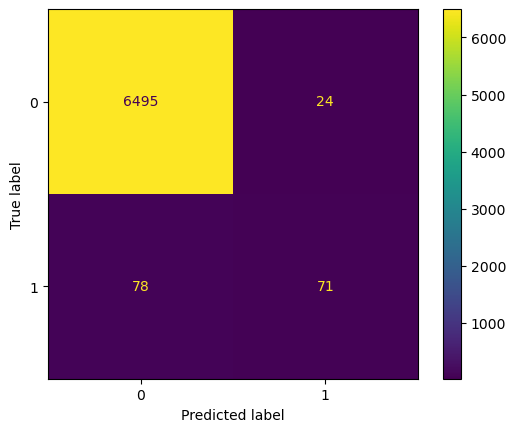

In [28]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix= confusion_matrix, display_labels= [0,1])

cm_display.plot()
plt.show()

accuracy = ((True Positive + True Negative) / Total Predictions)

Precision = True Positive / (True Positive + False Positive)

Recall = True Positive / (True Positive + False Negative)

f1 = True Negative / (True Negative + False Positive)

### 2.3 In de Kaggle competitie zie je dat er is gekozen voor de f1-score om te beoordelen hoe goed een model presteert. Leg uit waarom f1-score voor dit vraagstuk de beste maatstaf is

De F1 score wordt gebruikt als je zowel hoge precision als recall wilt hebben. Accuracy meet ook hoeveel er correct predict zijn, echter werkt dit alleen goed met balanced data sets. Precision meet hoeveel positieve predictions correct zijn en recall meet hoeveel van de aanwezige positieve class samples correct zijn geindentificeerd.

De ene metric komt dus te koste van de ander. De F1 score combineerd deze, hierdoor heb je minder last van de unbalanced dataset en kan je je model efficient optimaliseren.

# 3. Modelleren en uitleg modellen

Pas cross-validation en hyperparameter tuning toe op ieder model.

Als je de beste hyperparameters voor een model hebt gevonden dan pas je het model met die hyperparameters toe op test.csv. De voorspellingen upload je op Kaggle om te zien hoe goed een model presteert.

De dataset is een “imbalanced dataset”. Leg uit waarom dit zo is. Er zijn meerdere technieken waarmee je voorspellingen voor zo’n dataset kunt verbeteren. Zonder toepassingvan deze technieken zullen je voorspellingen erg slecht zijn. Pas voor alle modellen ensembles minimaal 2 van deze technieken toe en leg uit hoe iedere techniek werk

## 3.1 KNN

#### 3.1.1 Leg uit hoe model werkt. Gebruik daarin onder andere termen “afstand”, “euclidean” en “manhattan

### 3.1.2 Leg uit waarom standaardisatie voor dit model van groot belang

### 3.1.3 Bepaal bij welke hyperparameters het model de beste resultaten geeft op degekozen metric

### 3.1.4 Leg uit hoe regularisatie werkt voor dit model

## 3.2 Logistic Regression

### 3.2.1 Leg uit hoe het model werkt

### 3.2.2 Toon de wiskundig formule voor de loss-functie en ligt deze toe

### 3.2.3 Leg uit wat gradient descent is in deze context. Leg dit uit aan de hand van een eenvoudig rekenvoorbeeld en geef hierbij de relevant wiskundige formules

### 3.2.4 Benoem de vormen van regularisatie die van toepassing zijn op dit model. Leg aan de hand van wiskundige formules uit hoe iedere vorm werkt en wat het effect is van iedere vorm

### 3.2.5 Beschrijf hoe regularisatie zich verhoudt ten opzichte van overfitting

### 3.2.6 Bepaal bij welke hyperparameters het model de beste resultaten geeft op degekozen metric

## 3.3 SVM

In [119]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import svm
from imblearn.under_sampling import InstanceHardnessThreshold
from sklearn.metrics import f1_score

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train = train.astype({col: int for col in train.columns if train[col].dtype == 'bool'})
test = test.astype({col: int for col in test.columns if test[col].dtype == 'bool'})

bmi_col = train[['bmi']]
z_scores = np.abs(stats.zscore(bmi_col))
outliers = np.where(z_scores > 3) 
outliers_rows = bmi_col[(z_scores > 3).any(axis=1)] 
train = train.drop(outliers_rows.index)


train.drop(columns = ['gender_Male' , 'gender_Other' , 'ever_married_No' , 'Residence_type_Rural' , 'id'] , inplace = True)
train.rename(columns = {'gender_Female' : 'gender'} , inplace = True)

test_data_ids = test['id']

test.drop(columns = ['gender_Male' , 'gender_Other' , 'ever_married_No' , 'Residence_type_Rural' , 'id'] , inplace = True)
test.rename(columns = {'gender_Female' : 'gender'} , inplace = True)


test = sc.fit_transform(test) 

X = train.drop(columns=['stroke'])
y = train['stroke']

iht = InstanceHardnessThreshold(random_state=42, n_jobs=-1)
X_resampled, y_resampled = iht.fit_resample(X, y)

sc = StandardScaler()

X_resampled = sc.fit_transform(X_resampled) 

print(y_resampled.value_counts())

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3,random_state=42)

clf = svm.SVC(kernel='rbf', C=100)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)


print("F1 score:", f1_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

stroke
0    21711
1      515
Name: count, dtype: int64
F1 score: 0.5819672131147541
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      6519
           1       0.75      0.48      0.58       149

    accuracy                           0.98      6668
   macro avg       0.87      0.74      0.79      6668
weighted avg       0.98      0.98      0.98      6668



In [90]:
SVM_pred = clf.predict(test)
SVM_pred_df = test_data_ids.to_frame()
SVM_pred_df['stroke'] = SVM_pred
SVM_pred_df.to_csv('SVM_pred_13.csv', index=False)

### 3.3.1 Beschrijf de werking van dit model. Toon hierbij de relevante wiskundige formules en leg ze uit aan de hand van een rekenvoorbeeld. Gebruik hierbij een klein deel van de dataset. Leg ook uit wat een kernel is en wat de kernel trick is

Een SVM werkt door data in kaart te kunnen brengen op in een hogere dimensie. Stel je een grafiek voor waar een lijn doorheen gaat om te classes te bepalen, een svm kan hier extra dimensies aan toevoegen waardoor het bij 1 extra bijvoorbeeld een vlak wordt.



**Rekenvoorbeeld en kernel trick uitleg**

### 3.3.2 De wiskundig formule voor de loss functie en de regularisatie

$$\min_{\mathbf{w}, b, \xi} \frac{1}{2} ||\mathbf{w}||^2 + C \sum_{i=1}^{n} \max(0, 1 - y_i f(\mathbf{x}_i)) 


### Toelichting: 
1. **L2 Regularisatie** 
```math
\left(\frac{1}{2} ||\mathbf{w}||^2\right)
```
   - Dit zorgt voor kleine gewichten, het maximaliseerd de marge tussen de 2 classes. Een kleinere ||w|| betekent een kleinere marge, dit zorgt voor meer generalisatie en minder overfitting.


2. **C Parameter of "Soft Margin Regularisatie" (C=100)**:
   - Een hoge C waarde (in dit geval, 100) betekent dat het model een hogere nadruk legt op het minimaliseren van foute classificaties.
   - Dit zou kunnen leiden to overfitten als het model te goed leert te werken op de trainingdata, dit komt doordat de 'decision boundary' te complex wordt om te generaliseren. In ons geval werkt dit nog vrij goed.

3. **Hinge Loss** 
```math
\left(\max(0, 1 - y_i f(\mathbf{x}_i))\right)
```

   - De hinge loss zorgt er voor dat de punten die correct geclassificeerd zijn buiten het marge geen loss toevoegen.
   - Als een punt binnen de marge of fout geclassificeerd is, groeit de loss exponentieel in proportie met hoe fout die is.



### 3.3.4 Bepaal bij welke hyperparameters het model de beste resultaten geeft op degekozen metric

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
import scipy.stats

In [88]:
from sklearn.model_selection import GridSearchCV
param_grid = {'kernel': ['rbf'],
              'C' : [0.1, 1, 10, 100,],
#              'class_weight': ['balanced', None],
#              'degree': [1, 2, 3], alleen relevant voor polynominal
#              'gamma': ('scale', 'auto', 0.0001,  0.01, 1, 10),
#              'probability': [True]
#              'decision_function_shape': [ 'ovo', 'ovr'], Maakt niet uit voor binary probleem
#              'break_ties': [True, False] geen multiclass probleem dus niet relevant
              }

grid_dt = GridSearchCV(svm.SVC(),
                       param_grid=param_grid,
                       scoring='f1',
                       cv=5,
                       n_jobs=-1)

grid_dt.fit(X_train, y_train)

best_svm = grid_dt.best_estimator_
best_hyperparams = grid_dt.best_params_
print('Best hyerparameters:\n', best_hyperparams)

print("F1 Score", f1_score(y_test, y_pred))
print("classification_report:\n", classification_report(y_test, y_pred))


Best hyerparameters:
 {'C': 10, 'class_weight': 'balanced', 'gamma': 10, 'kernel': 'rbf'}
F1 Score 0.9549591238624093
classification_report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.96      6581
           1       0.95      0.96      0.95      6446

    accuracy                           0.96     13027
   macro avg       0.96      0.96      0.96     13027
weighted avg       0.96      0.96      0.96     13027



## 3.4 Decision Tree

### 3.4.1 Beschrijf de werking van dit model

### 3.4.2 Beschrijf de criteria op basis waarvan de splitsingen in de beslisboon kunnen worden gemaakt

### 3.4.3 Bepaal bij welke hyperparameters het model de beste resultaten geeft op degekozen metric

### 3.4.4 Leg uit wat ‘pruning’ is en beschrijf welke vormen hiervan zijn toegepast. Leg de relatie tussen ‘pruning’ en ‘underfitting / overfitting’ uit

## 3.5 Ensembles  (Random Forest, Gradient Boosted Boosted Decistion Trees en XGboost)

In [116]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from imblearn.under_sampling import InstanceHardnessThreshold
from imblearn.over_sampling import ADASYN
from sklearn.metrics import f1_score

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train = train.astype({col: int for col in train.columns if train[col].dtype == 'bool'})
test = test.astype({col: int for col in test.columns if test[col].dtype == 'bool'})

bmi_col = train[['bmi']]
z_scores = np.abs(stats.zscore(bmi_col))
outliers = np.where(z_scores > 3) 
outliers_rows = bmi_col[(z_scores > 3).any(axis=1)] 
train = train.drop(outliers_rows.index)


train.drop(columns = ['gender_Male' , 'gender_Other' , 'ever_married_No' , 'Residence_type_Rural' , 'id'] , inplace = True)
train.rename(columns = {'gender_Female' : 'gender'} , inplace = True)

test_data_ids = test['id']

test.drop(columns = ['gender_Male' , 'gender_Other' , 'ever_married_No' , 'Residence_type_Rural' , 'id'] , inplace = True)
test.rename(columns = {'gender_Female' : 'gender'} , inplace = True)


test = sc.fit_transform(test) 

X = train.drop(columns=['stroke'])
y = train['stroke']

iht = InstanceHardnessThreshold(random_state=42, n_jobs=-1)
adasyn = ADASYN(random_state=42)
X_resampled, y_resampled = iht.fit_resample(X, y)
X_resampled, y_resampled = adasyn.fit_resample(X_resampled, y_resampled)

sc = StandardScaler()

X_resampled = sc.fit_transform(X_resampled) 

print(y_resampled.value_counts())

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3,random_state=42) 

xgb = XGBClassifier(learing_rate=0.1,
                    max_depth = 8
                    )

xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)


print("F1 score:", f1_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

stroke
0    21711
1    21711
Name: count, dtype: int64
F1 score: 0.9887206427688504
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      6581
           1       0.98      0.99      0.99      6446

    accuracy                           0.99     13027
   macro avg       0.99      0.99      0.99     13027
weighted avg       0.99      0.99      0.99     13027



c:\Users\jassa\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "learing_rate" } are not used.

  warnings.warn(smsg, UserWarning)


In [117]:
XGB_pred = xgb.predict(test)
XGB_pred_df = test_data_ids.to_frame()
XGB_pred_df['stroke'] = XGB_pred
XGB_pred_df.to_csv('xgb_pred_2.csv', index=False)

In [77]:
from sklearn.model_selection import GridSearchCV
param_grid = {'learing_rate': [0.1, 0.3, 0.8],
              'gamma': [0, 3, 6, 10, 100],
              'max_depth': [2,6,8],
              }

grid_xgb = GridSearchCV(XGBClassifier(),
                       param_grid=param_grid,
                       scoring='f1',
                       cv=5,
                       n_jobs=-1)

grid_xgb.fit(X_train, y_train)

best_svm = grid_xgb.best_estimator_
best_hyperparams = grid_xgb.best_params_
print('Best hyerparameters:\n', best_hyperparams)

print("F1 Score", f1_score(y_test, y_pred))
print("classification_report:\n", classification_report(y_test, y_pred))

Best hyerparameters:
 {'gamma': 0, 'learing_rate': 0.1, 'max_depth': 8}
F1 Score 0.9655492761477124
classification_report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.97      6581
           1       0.96      0.97      0.97      6446

    accuracy                           0.97     13027
   macro avg       0.97      0.97      0.97     13027
weighted avg       0.97      0.97      0.97     13027



c:\Users\jassa\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:42:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "learing_rate" } are not used.

  warnings.warn(smsg, UserWarning)


### 3.5.1 Beschrijf de werking van de 3 genoemde ensembles. Gebruik daarbij o.a. de termen “bagging (bootstrap aggregation)” en “boosting “. Leg daarbij uit welke ensembles relatief veel trainingstijd nodig hebben en welke weinig tijd. Gebruik daarbij o.a. de termen “sequential” en “parallel"

### 3.5.2 Bepaal bij welke hyperparameters ieder ensemble de beste resultaten geeft op de gekozen metric.

## 3.6 Zelf samengesteld ensemble

Ensemble dient te bestaan uit minimaal drie modellen

### 3.6.1 Leg uit hoe een ensemble werkt en beschrijf welke vorm van “voting” je hebtgekozen en waarom

### 3.6.2 Leg uit waarom je hebt gekozen voor de modellen in je ensemble

### 3.6.3 Bepaal bij welke hyperparameters het model de beste resultaten geeft op degekozen metric

# 4. Conclusie en advies

### 4.1 Geef in een tabel een overzicht van de scores van alle toegepaste modellen en ensembles. Laat daarin van ieder model en ensemble zien hoe het presteerde in je notebook en op Kaggle

### 4.2 Welke model presteert het beste? Waarom? Bij welke parameters?

### 4.3 De prestaties van een model zijn belangrijk. Welke overwegingen spelen nog meer een rol, naast de prestaties van het model, om een juiste keuze voor een model te maken

### 4.4 Welke model adviseer je aan artsen om te gebruiken? Leg uit waarom?